<a href="https://colab.research.google.com/github/jsilryan/Deep-Learning-Practice/blob/master/Pytorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import torch
torch.cuda.is_available()

True

In [89]:
# Setup device agnostic code -> https://pytorch.org/docs/1.0.1/notes/cuda.html
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [90]:
# Count number of devices
torch.cuda.device_count()

1

In [91]:
!nvidia-smi

Tue Aug  8 19:41:53 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    30W /  70W |    601MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Put Tensors and Models on the GPU

In [92]:
#Create a tensor (default is on CPU)
tensor = torch.tensor([1,2,3], device = "cpu")
print(tensor, tensor.device)

tensor([1, 2, 3]) cpu


In [93]:
#Move to GPU if available
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

### Move tensors back to CPU

In [94]:
# Can't transform a tensor to NumPy if on GPU
# tensor_on_gpu.numpy()
# Forst set it to CPU
tensor_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_on_cpu

array([1, 2, 3])

In [95]:
new_tensor = torch.rand(7,7)
new_tensor

tensor([[0.3829, 0.9593, 0.3904, 0.6009, 0.2566, 0.7936, 0.9408],
        [0.1332, 0.9346, 0.5936, 0.8694, 0.5677, 0.7411, 0.4294],
        [0.8854, 0.5739, 0.2666, 0.6274, 0.2696, 0.4414, 0.2969],
        [0.8317, 0.1053, 0.2695, 0.3588, 0.1994, 0.5472, 0.0062],
        [0.9516, 0.0753, 0.8860, 0.5832, 0.3376, 0.8090, 0.5779],
        [0.9040, 0.5547, 0.3423, 0.6343, 0.3644, 0.7104, 0.9464],
        [0.7890, 0.2814, 0.7886, 0.5895, 0.7539, 0.1952, 0.0050]])

Exercise:
1. Read Torch.tensor, torch.cuda

In [96]:
new_tensor1 = torch.rand(1,7)
new_tensor1

tensor([[0.3068, 0.1165, 0.9103, 0.6440, 0.7071, 0.6581, 0.4913]])

In [97]:
new_tensor1.T # Transposing it

tensor([[0.3068],
        [0.1165],
        [0.9103],
        [0.6440],
        [0.7071],
        [0.6581],
        [0.4913]])

In [98]:
torch.matmul(new_tensor, new_tensor1.T)

tensor([[2.1376],
        [2.3501],
        [1.6123],
        [1.2480],
        [2.5379],
        [2.2523],
        [2.0364]])

In [99]:
seed = 0
torch.manual_seed(seed)
new_tensor2 = torch.rand(7,7)
print(new_tensor2)
torch.manual_seed(seed)
nt_3 = torch.rand(1,7)
nt_3T = nt_3.T
print(nt_3, "\n", nt_3T)
nt_4 = torch.matmul(new_tensor2, nt_3T)
print(nt_4)

tensor([[0.4963, 0.7682, 0.0885, 0.1320, 0.3074, 0.6341, 0.4901],
        [0.8964, 0.4556, 0.6323, 0.3489, 0.4017, 0.0223, 0.1689],
        [0.2939, 0.5185, 0.6977, 0.8000, 0.1610, 0.2823, 0.6816],
        [0.9152, 0.3971, 0.8742, 0.4194, 0.5529, 0.9527, 0.0362],
        [0.1852, 0.3734, 0.3051, 0.9320, 0.1759, 0.2698, 0.1507],
        [0.0317, 0.2081, 0.9298, 0.7231, 0.7423, 0.5263, 0.2437],
        [0.5846, 0.0332, 0.1387, 0.2422, 0.8155, 0.7932, 0.2783]])
tensor([[0.4963, 0.7682, 0.0885, 0.1320, 0.3074, 0.6341, 0.4901]]) 
 tensor([[0.4963],
        [0.7682],
        [0.0885],
        [0.1320],
        [0.3074],
        [0.6341],
        [0.4901]])
tensor([[1.5985],
        [1.1173],
        [1.2741],
        [1.6838],
        [0.8279],
        [1.0347],
        [1.2498]])


In [100]:
#Manual seed for cuda
new_seed = 1234
torch.manual_seed(new_seed)
nt_5 = torch.rand(2,3)
print(nt_5, "\n")
torch.manual_seed(new_seed)
nt_6 = torch.rand(2,3)
print(nt_6)
nt_7 = nt_6.T
nt_8 = torch.matmul(nt_5, nt_7)
print(nt_8)


tensor([[0.0290, 0.4019, 0.2598],
        [0.3666, 0.0583, 0.7006]]) 

tensor([[0.0290, 0.4019, 0.2598],
        [0.3666, 0.0583, 0.7006]])
tensor([[0.2299, 0.2161],
        [0.2161, 0.6287]])


In [101]:
print(nt_8.min(), nt_8.max())
print(nt_8.argmin(), nt_8.argmax())

tensor(0.2161) tensor(0.6287)
tensor(1) tensor(3)


In [102]:
seed = 7
torch.manual_seed(seed)
nt_9 = torch.rand(1,1,1,10)
torch.manual_seed(seed)
nt_10 = nt_9.squeeze() #removes dimensions with size 1
print(nt_9, nt_9.shape) # or .size()
print(nt_10, nt_10.shape)


tensor([[[[0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297,
           0.3653, 0.8513]]]]) torch.Size([1, 1, 1, 10])
tensor([0.5349, 0.1988, 0.6592, 0.6569, 0.2328, 0.4251, 0.2071, 0.6297, 0.3653,
        0.8513]) torch.Size([10])


### Pytorch Workflow
1. Get Data Ready -> Prepare and load data
2. Build or pick a pretrained model to suit my problem -> Pick a loss function and optimizer -> Build a training loop
3. Fit the model to data and make a prediction
4. Evaluate the model -> Make predictions
5. Improve through experimentation
6. Save and reload the model

In [103]:
import torch
from torch import nn #Has all basic buildig blocks for graphs -> Basic neural network
import matplotlib.pyplot as plt

#pytorch version
torch.__version__

'2.0.1+cu118'

## 1. Data (preparing and loading)

* Excel spreadsheet
* Images of any kind
* Videos
* Audio
* DNA
* Text

ML is a game of 2 parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

Linear Regression Formula:
* Y = mX + C
* Make a straight line with known parameters

In [104]:
#Known Parameters
weight = 0.7 # m
bias = 0.3 # C

#Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # Capital - Matrix or tensor -> Unsqueeze adds an extra dimension to the first dimension
y = weight * X + bias# Lowercase - Vector
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [105]:
len(X), len(y)
#I want to learn the representaion of my input and how it maps to the output

(50, 50)

### Split data to training and testing
Helps in generalization -> ability for a machine to perform well on data it hasn't seen before.
Course Material (training set -> 60-80%)
Practice exam (validation set -> 10-20%)
Final exam (test set -> 10-20%)

Scikit learn's train test split

In [106]:
#Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

Visualize

In [107]:
def plot_predictions(train_data = X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None
                     ):
  """
  Plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10,7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=5, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=10, label="Testing data")

  #Predictions
  if predictions is not None:
    # Plot predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=15, label="Predictions")

  # Show legend
  plt.legend(prop={"size": 14})

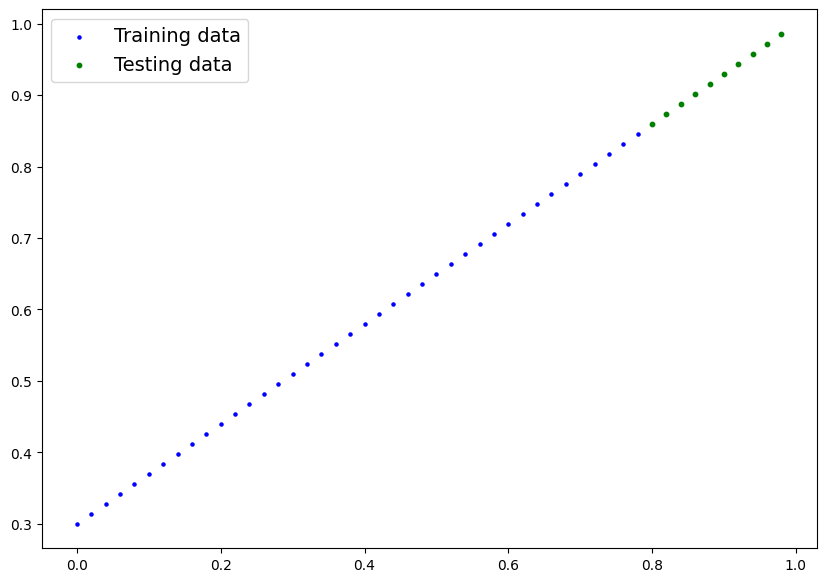

In [108]:
plot_predictions()

## Model
OOP in python -> Real Python

The model runs the random weight and bias values through the forward calculation and adjusts the weight and bias to represent as close as possible if not perfect, the known params.

What it does:
* Start with random values (weight and bias)
* Look at the training data and adjust the random values to better represent (or get closer to) the ideal values (weight and bias we used to create the data).

How it does so:
1. Gradient descent -> requires-grad=True -> keeps track of the weights and bias parameters and updates them using a combination of the 2
2. Back propagation

In [109]:
# Linear Regression model class
class LinearRegressionModel(nn.Module): #<-Inherit almost everything on Pytorch - Base class for all neural network modules
  def __init__(self): #Constructor
    super().__init__()
    #Initialize model parameters
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float32))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  #Forward method to define the computation in model
  def forward(self, x: torch.Tensor) -> torch.Tensor: #x is the input data
    return self.weights * x +  self.bias

# nn.Module - building blocks of neural network
# requires.grad = True -> Pytorch will track the gradients of the specific parameter for use with  torch.autograd and gradienet descent.
# Any nn.Module subclass requires a forward method -> Defines the computation defined at every call -> Override

## Pytorch model building essentials

* torch.nn - all buildings for computational graphs (a neural network is a computational graph)
* nn.Parameter - what parameters should our model try and learn, often a pytorch layer from torch.nn will set it up
* torch.nn.Module - base class for all NN modules, if you subclass, overwrite forward
* torch.optim - optimizers in Pytorch. Help with gradient descent - Instead of being random, get values that better represent the data.
* def forward() - All nn.Module subclasses require me to overwrite forward. Defines what happens in forward computation
* torch.utils.data.Dataset -> Represents a map between key(label) and sample (features) pairs of your data eg images and their associated labels.
* torch.utils.data.DataLoader -> Creates a Python iterable over a torch Dataset (iterate over my data)
* torchvision.transforms, torchvision.models
* Evaluate - torchmetrics
* Improve via experimentation - torch.utils.tensorboard
* Pytorch cheat sheet -> `https://pytorch.org/tutorials/beginner/ptcheat.html`

Check  our model parameters using `.parameters`

In [110]:
# Create random seed to avoid getting different values every time
torch.manual_seed(2)

# Create an instance of the model
model_0 = LinearRegressionModel()

#Check parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3923], requires_grad=True),
 Parameter containing:
 tensor([-0.2236], requires_grad=True)]

In [111]:
# List named parameters: Get the model's random weight and bias to get as close as possible to the ideal values
print(model_0.state_dict())
print(weight, bias)

OrderedDict([('weights', tensor([0.3923])), ('bias', tensor([-0.2236]))])
0.7 0.3


In [112]:
print("Ideal situation:\n")
print("X_test : ", X_test)
print("\ny_test : ", y_test)

Ideal situation:

X_test :  tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

y_test :  tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


### Make predictions with `torch.inference_mode()`

To check model's predictive power, check how well it predicts 'y_test' based on 'X_test'

Data passed through the model runs through the `forward()` method.

Settings -> Editor = set line numbers, indentation guides

Not Implemented error -> align def functions

In [113]:
# Make predictions
with torch.inference_mode(): # Context-manager for making predictions. Inference mode removes the gradient tracking -> We aren't training hence no need to keep track of how we update the model. Pytorch keeps track of smaller data
  # Does what torch.no_grad(): does
  # y_preds = model_0(X_test) works too, but puts the grad func
  y_preds = model_0(X_test)

y_preds

tensor([[0.0903],
        [0.0981],
        [0.1060],
        [0.1138],
        [0.1217],
        [0.1295],
        [0.1373],
        [0.1452],
        [0.1530],
        [0.1609]])

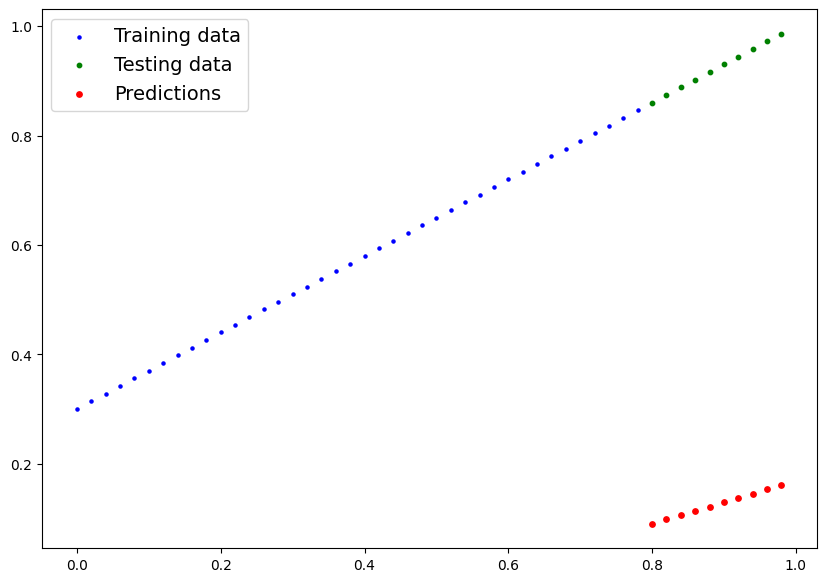

In [114]:
plot_predictions(predictions=y_preds)

## 3. Train Model

Train a model to move from some unknown parameters (could be random)to some known parameter

From a poor representation of data to a better representation of the data

Measure how poorly the model predictions are by using a loss function (cost function or criterion).

What I need to train:

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.
`https://pytorch.org/docs/stable/nn.html#loss-functions`
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (eg weight & bias) to improve the loss function.
`https://pytorch.org/docs/stable/optim.html`

Pytorch:
* A training loop
* A testing loop

L1loss -> Mean absolute error
MSELoss -> Creates a criterion that measures the mean squared error (squared L2 norm) between each element in the input x and target y.
`https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html#torch.nn.L1Loss`

MAE_loss = torch.mean(torch.abs(y_pred-y_test)) or

MAE_Loss = torch.nn.L1Loss

In [115]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), #params -> model parameters I want to optimize
                            lr = 0.01) #lr = Learning Rate => Hyperparameter I set myself - how big or small the optimizer adjusts the params
# Higher learning rate, higher it adjusts the parameters per hit and vice versa
# Classification problem eg cat or dog, I'll most likely use a nn.BCELoss -> binary cross entropy

### Build a training (and testing) loop in pytorch

Needs in a training loop:
1. Loop through the data
2. Forward pass / propagation - data moves through the model's forward() function(s) to make predictions on data -> move from input to output
3. Calculate the loss - compare forward pass predictions to ground truth labels
4. Optimizer zero grad
5. Loss backward - moves backwards through the network to calculate the gradients of each of the parameters of our model with respect to loss -> **back propagation**
6. Optimizer step - use the model's parameters to try and improve the loss -> **gradient descent**

Gradient - derivative of a function that has more than 1 input variable


In [116]:
torch.manual_seed(2)
# Epoch - one loop through the data -> hyperparameter since I've set it myself
epochs = 400
# requires_grad = true -> track the gradients of each of the parameter and get where the lowest point / gradient is
# Head in the opposite direction of the gradient to get to a gradient value of 0, and if it's 0, the loss function is also 0
# Torch.autograd ->
# Learning rate scheduling -> maybe start with big steps, and as we come closer to the bottom reduce their sizes

# Track different values -> compare different experiments
epoch_count = []
loss_values = []
test_loss_values = []

# 1. Loop through the data
for epoch in range(epochs):
  #Set the model to training mode - default
  model_0.train() # Sets all parameters that require gradients to require gradients

  # 2. Forward pass
  y_pred = model_0(X_train)

  # 3. Calculate Loss -> predictions(input), labels(target / true values)
  loss = loss_fn(y_pred, y_train)

  # 4. Optimizer Zero Grad
  optimizer.zero_grad()

  # 5. Backpropagation on the loss with respect to parameters of the model
  loss.backward()

  # 6. Step the optimizer -> Gradient Descent
  optimizer.step() # By default how the optimizer changes will accumulate through the loop so... I have to zero them above in step 3 for the next loop's iteration

  # Testing
  model_0.eval() # Turns off different settings in the model not needed for evaluation/testing (dropout, batch norm layers)
  with torch.inference_mode(): # Turns off gradient tracking -> Makes it faster
  #with torch.no_grad(): -> Older code
    # 1. Forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test) # Trains on training data, tests on test data

  #Print what's happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} |Test Loss: {test_loss}")
    # Print model.state_dict()
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.6435682773590088 |Test Loss: 0.7839487791061401
OrderedDict([('weights', tensor([0.3962])), ('bias', tensor([-0.2136]))])
Epoch: 10 | Loss: 0.5283582806587219 |Test Loss: 0.6492388844490051
OrderedDict([('weights', tensor([0.4352])), ('bias', tensor([-0.1136]))])
Epoch: 20 | Loss: 0.41314831376075745 |Test Loss: 0.5145289897918701
OrderedDict([('weights', tensor([0.4742])), ('bias', tensor([-0.0136]))])
Epoch: 30 | Loss: 0.2979383170604706 |Test Loss: 0.3798190653324127
OrderedDict([('weights', tensor([0.5132])), ('bias', tensor([0.0864]))])
Epoch: 40 | Loss: 0.1827283352613449 |Test Loss: 0.24510908126831055
OrderedDict([('weights', tensor([0.5522])), ('bias', tensor([0.1864]))])
Epoch: 50 | Loss: 0.06751836836338043 |Test Loss: 0.11039917171001434
OrderedDict([('weights', tensor([0.5912])), ('bias', tensor([0.2864]))])
Epoch: 60 | Loss: 0.016020705923438072 |Test Loss: 0.03857617825269699
OrderedDict([('weights', tensor([0.6219])), ('bias', tensor([0.3309]))])
Epoc

In [117]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6949])), ('bias', tensor([0.2994]))])

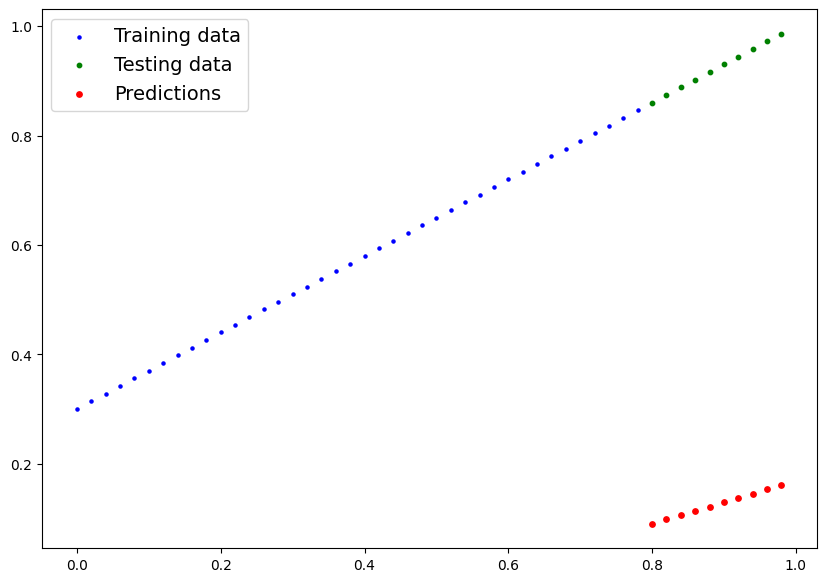

In [118]:
plot_predictions(predictions=y_preds)

In [119]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [120]:
import numpy as np
np.array(torch.tensor(loss_values).cpu().numpy())
#Drop out + Batch normalization layers

array([0.6435683 , 0.5283583 , 0.4131483 , 0.29793832, 0.18272834,
       0.06751837, 0.01602071, 0.01247904, 0.00904281, 0.00561423,
       0.00217542, 0.00254229, 0.00254229, 0.00254229, 0.00254229,
       0.00254229, 0.00254229, 0.00254229, 0.00254229, 0.00254229,
       0.00254229, 0.00254229, 0.00254229, 0.00254229, 0.00254229,
       0.00254229, 0.00254229, 0.00254229, 0.00254229, 0.00254229,
       0.00254229, 0.00254229, 0.00254229, 0.00254229, 0.00254229,
       0.00254229, 0.00254229, 0.00254229, 0.00254229, 0.00254229],
      dtype=float32)

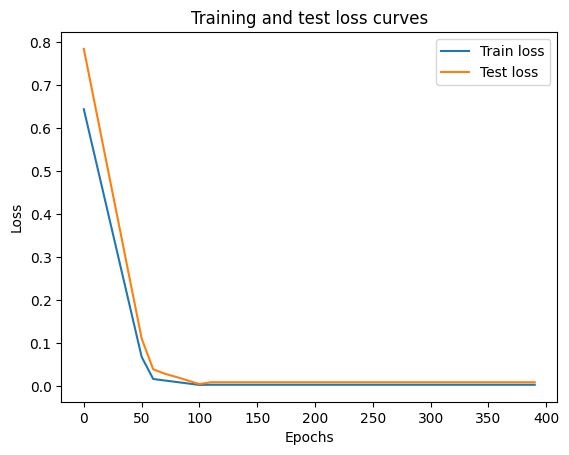

In [121]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

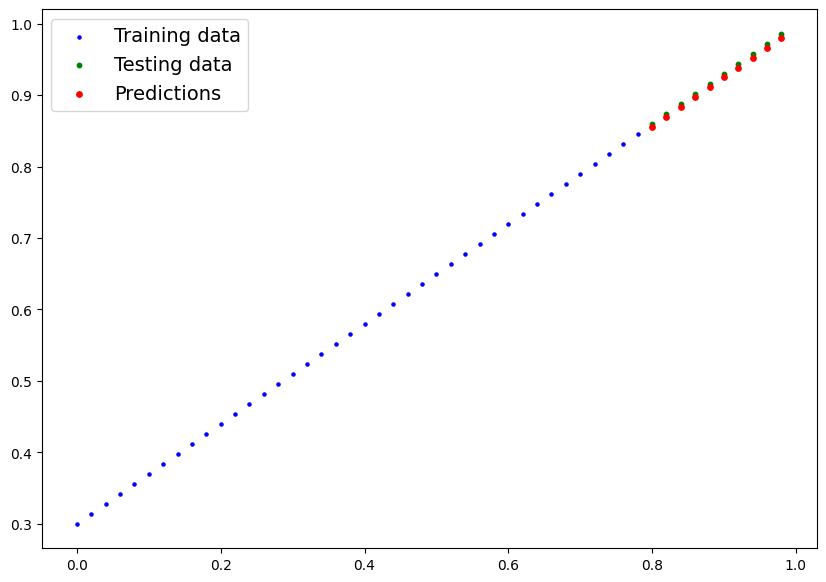

In [122]:
plot_predictions(predictions = y_preds_new)

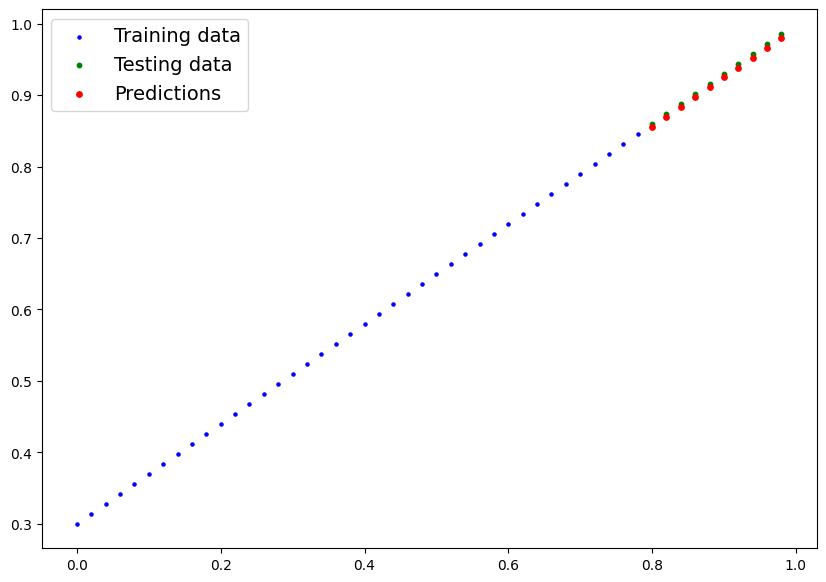

In [123]:
with torch.inference_mode():
  y_preds_new1 = model_0(X_test)
plot_predictions(predictions = y_preds_new1)

In [124]:
!nvidia-smi

Tue Aug  8 19:41:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    30W /  70W |    601MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Saving a model in Pytorch

> `torch.save()` - allows me to save a PyTorch object i Python's Pickle format
- Pickle module -> implements binary protocols for serializing and deserializing a Python object structure
- Pickling - a Python object hierarchy is converted into a byte stream
- Unpickling - a byte stream (binary file or byts-like object) is converted back into an object hierarchy

> `torch.load()` - allows me to load a saved PyTorch object

> `torch.nn.Module.load_state_dict()` - allows to a load a model's saved state dictionary








In [125]:
model_0.state_dict()
# A state_dict is a Python dictionary object that maps each layer to its parameter tensor

OrderedDict([('weights', tensor([0.6949])), ('bias', tensor([0.2994]))])

In [126]:
# Saving PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

# 2. Create a Model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth" #.pth or .pt for pytorch models
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(), f = MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [127]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1207 Aug  8 19:41 01_pytorch_workflow_model_0.pth


## Loading a Pytorch Model

Since I saved the model's `state_dict` rather the entire model, I'll create a new instance of the model's class and load the saved `state_dict` into that.


In [128]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6949])), ('bias', tensor([0.2994]))])

In [129]:
# To load in a saved state dict, I should insntantiate a new instance of the model class
loaded_model_0 = LinearRegressionModel()
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.3923])), ('bias', tensor([-0.2236]))])

In [130]:
loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

<All keys matched successfully>

In [131]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6949])), ('bias', tensor([0.2994]))])

In [132]:
# Make some predictions with the loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [133]:
# Compare loaded model preds with original model preds
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Put everything together

In [184]:
import torch
from torch import nn
import matplotlib.pyplot as plt

#Check PyTorch version
torch.__version__

'2.0.1+cu118'

Create Device Agnostic Code

If we have access to a GPU, the code will use it - for faster computing

If no GPU is available, it will default to using CPU

In [198]:
# Device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cuda


### 6.1 Data

In [215]:
# Create some dummy data using Linear Regression formula -> y = weight * X + bias
weight = 0.7
bias = 0.3

# Range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) #Unsqueeze to avoid errors
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [216]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

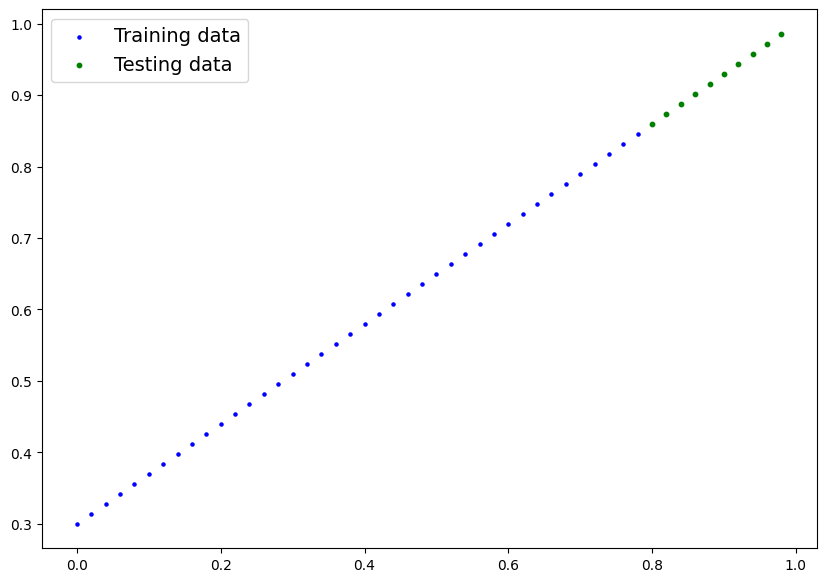

In [217]:
plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 Build a PyTorch linear model

In [218]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() (Linear regression model) for creating the model parameters - Linear transfor, probing layer, fully connected layer, dense layer (tf)
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor: #Input should be a torch.Tensor and the output a torch.Tensor too
    return self.linear_layer(x)

# Set manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [220]:
# Check model_current device
next(model_1.parameters()).device

device(type='cuda', index=0)

In [219]:
# Set the model to use target device
model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [221]:
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.3 Training

For training:
* Loss Function
* Optimizer
* Training Loop
* Testing Loop

In [222]:
# Setup Loss Function
loss_fn = nn.L1Loss()

# Optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [223]:
# Training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate Loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad -> reduce gradient to 0 after every iteration so it starts fresh
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ## Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss : {loss} | Test Loss : {test_loss}")


Epoch: 0 | Loss : 0.5551779866218567 | Test Loss : 0.5739762187004089
Epoch: 10 | Loss : 0.439968079328537 | Test Loss : 0.4392664134502411
Epoch: 20 | Loss : 0.3247582018375397 | Test Loss : 0.30455657839775085
Epoch: 30 | Loss : 0.20954833924770355 | Test Loss : 0.16984669864177704
Epoch: 40 | Loss : 0.09433845430612564 | Test Loss : 0.03513690456748009
Epoch: 50 | Loss : 0.023886388167738914 | Test Loss : 0.04784907028079033
Epoch: 60 | Loss : 0.019956795498728752 | Test Loss : 0.045803118497133255
Epoch: 70 | Loss : 0.016517987474799156 | Test Loss : 0.037530567497015
Epoch: 80 | Loss : 0.013089174404740334 | Test Loss : 0.02994490973651409
Epoch: 90 | Loss : 0.009653178043663502 | Test Loss : 0.02167237363755703
Epoch: 100 | Loss : 0.006215683650225401 | Test Loss : 0.014086711220443249
Epoch: 110 | Loss : 0.00278724217787385 | Test Loss : 0.005814164876937866
Epoch: 120 | Loss : 0.0012645035749301314 | Test Loss : 0.013801801018416882
Epoch: 130 | Loss : 0.0012645035749301314 | T

In [224]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

### 6.4 Making and Evaluating predictions

In [225]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

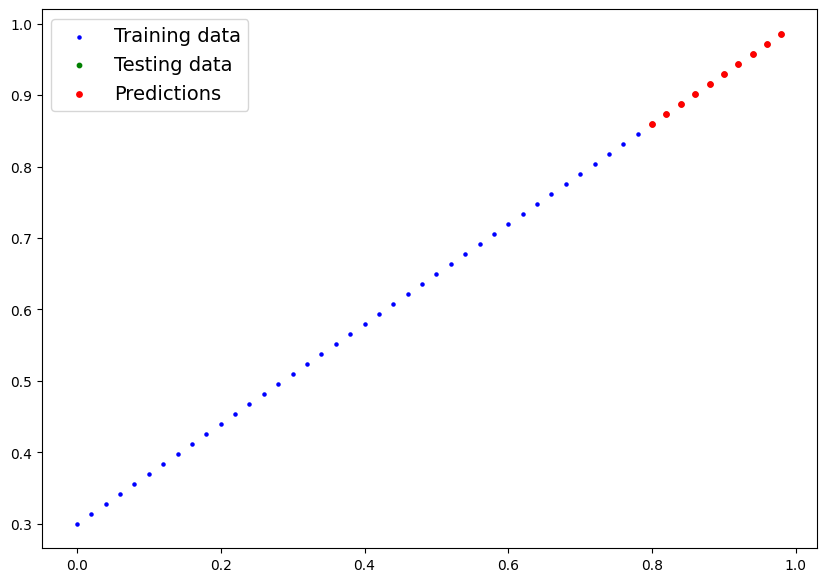

In [226]:
# Matplotlib uses numpy hence convert from tensor to numpy array
plot_predictions(predictions=y_preds.cpu())

### 6.5 Saving and Loading the model

In [227]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [228]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok = True)

MODEL_NAME = "model_1.pth"
SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj = model_1.state_dict(), f = SAVE_PATH)

In [230]:
# Loading the model

# New instance of the model
loaded_model_1 = LinearRegressionModelV2()

# Load saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [232]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [233]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [234]:
# Evaluate loaded model
loaded_model_1.eval()

with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

loaded_model_1_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')